In [168]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Подключение модуля для работы с файлами
from google.colab import files
''' выбрать *.csv-файл '''
uploaded = files.upload()

# Получение имени файла
filename = next(iter(uploaded))
filename

Saving проект.xlsx to проект.xlsx


'проект.xlsx'

In [183]:
import pandas as pd
import openpyxl

# Загрузка данных из файла Excel в датафрейм
with open(filename, 'rb') as f:
    workbook = openpyxl.load_workbook(f, read_only=True)
    sheet = workbook.active
    data = sheet.values
    # Используем первую строку данных в качестве заголовков столбцов
    df = pd.DataFrame(data)

# Присвоим первую строку датафрейма в качестве заголовков столбцов
df.columns = df.iloc[0]

# Удалим первую строку, которая теперь стала заголовками столбцов
df = df[1:]

# Вывод первых нескольких строк датафрейма для проверки

print(df.head())

0            Номенклатура Начальный остаток Приход Расход Конечный остаток   \
1  Бифидок п/эл 0,5л 2,5%              None  177.0  177.0              None   
2   Бифидок т/п 0,5л 2,5%              None  316.0  316.0              None   
3    Кефир п/эл 0,5л 2,5%              None  254.0  254.0              None   
4     Кефир т/п 0,5л 2,5%              None  574.0  574.0              None   
5     Масло вес н/с 72,5%              None  476.0  301.0             175.0   

0         Дата  
1  январь 2017  
2  январь 2017  
3  январь 2017  
4  январь 2017  
5  январь 2017  


In [184]:
# Обрежем датафрейм (удалим пустые строки)
df = df[:570]

In [185]:
# Вывод названий столбцов
print(df.columns)

Index(['Номенклатура', 'Начальный остаток', 'Приход', 'Расход',
       'Конечный остаток ', 'Дата'],
      dtype='object', name=0)


In [186]:
# Разделение столбца 'Дата' на месяц и год
df[['Месяц', 'Год']] = df['Дата'].str.split(expand=True)

# Преобразование месяцев в числовой формат (например, январь -> 1, февраль -> 2 и т. д.)
months_dict = {
    'январь': '1', 'февраль': '2', 'март': '3', 'апрель': '4', 'май': '5', 'июнь': '6',
    'июль': '7', 'август': '8', 'сентябрь': '9', 'октябрь': '10', 'ноябрь': '11', 'декабрь': '12'
}
df['Месяц'] = df['Месяц'].map(months_dict)

# Создание новой колонки 'Дата' в формате datetime
df['Дата'] = pd.to_datetime(df['Год'] + '-' + df['Месяц'] + '-1')

# Удаление ненужных столбцов 'Месяц' и 'Год'
df = df.drop(['Месяц', 'Год'], axis=1)

# Вывод информации о датафрейме для проверки
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Номенклатура       570 non-null    object        
 1   Начальный остаток  360 non-null    object        
 2   Приход             530 non-null    object        
 3   Расход             534 non-null    object        
 4   Конечный остаток   359 non-null    object        
 5   Дата               570 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB
None


In [187]:
# Преобразование значений в тип данных float
columns_to_convert = ['Приход', 'Расход', 'Начальный остаток', 'Конечный остаток ']
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Вывод информации о датафрейме для проверки
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Номенклатура       570 non-null    object        
 1   Начальный остаток  360 non-null    float64       
 2   Приход             530 non-null    float64       
 3   Расход             534 non-null    float64       
 4   Конечный остаток   359 non-null    float64       
 5   Дата               570 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 26.8+ KB
None


In [188]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

0
Номенклатура           0
Начальный остаток    210
Приход                40
Расход                36
Конечный остаток     211
Дата                   0
dtype: int64


In [189]:
# Заполнение пропущенных значений нулями
df = df.fillna(0)

In [190]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

0
Номенклатура         0
Начальный остаток    0
Приход               0
Расход               0
Конечный остаток     0
Дата                 0
dtype: int64


In [195]:
# Вывод описательной статистики
df.describe()

,Начальный остаток,Приход,Расход,Конечный остаток
count,570.000000,570.000000,570.000000,570.000000
mean,332.750947,5011.803032,4985.698295,358.855684
std,851.937135,10990.427159,10901.061076,917.083971
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,142.250000,149.250000,0.000000
50%,12.000000,415.500000,415.000000,12.000000
75%,175.000000,2335.500000,2303.250000,181.750000
max,6309.000000,66180.000000,65505.000000,6431.000000


Из предоставленной описательной статистики можно сделать следующие выводы:

1. **Начальный остаток**:
   - Среднее значение начального остатка составляет примерно 332.75 единицы товара.
   - Стандартное отклонение довольно высоко (851.94), что указывает на значительную вариабельность начального остатка.
   - Минимальное значение начального остатка равно 0, что может быть результатом отсутствия товаров на складе в начале периода.
   - 25% квантиль также равен 0, что указывает на то, что в 25% случаев начальный остаток составляет 0 единиц товара.

2. **Приход и Расход**:
   - Средние значения прихода и расхода примерно одинаковы и составляют около 5011.80 и 4985.70 соответственно.
   - Стандартное отклонение для обоих параметров также высоко, что указывает на значительную вариабельность в объеме поступлений и отгрузок товаров.
   - Минимальные значения прихода и расхода равны 0, что может быть результатом отсутствия поступлений или отгрузок товаров в некоторые периоды.
   - 25% квантиль для прихода и расхода также равен 0, что указывает на то, что в 25% случаев поступление и расход составляют 0 единиц товара.

3. **Конечный остаток**:
   - Среднее значение конечного остатка ниже среднего значения начального остатка и составляет около 358.86 единиц товара.
   - Стандартное отклонение для конечного остатка также высоко (917.08), что указывает на значительную вариабельность в остатках товаров.
   - Минимальное значение конечного остатка равно 0, что может быть результатом исчерпания запасов товара на складе в конце периода.
   - 25% квантиль также равен 0, что указывает на то, что в 25% случаев конечный остаток составляет 0 единиц товара.

Исходя из этого анализа, можно сделать вывод о том, что данные по начальному остатку, приходу, расходу и конечному остатку обладают значительной вариабельностью и могут быть подвержены значительным колебаниям в различные периоды времени.

Спрос можно определить как разницу между количеством товаров, поступивших на склад (приход) и количеством товаров, ушедших со склада (расход) за определенный период времени. Другими словами, спрос представляет собой изменение запасов товара на складе за этот период.

Если на склад поступило больше товаров, чем ушло (т.е. приход больше расхода), это означает, что спрос превышает предыдущие запасы, и мы можем ожидать увеличение запасов. В этом случае значение спроса будет положительным.

С другой стороны, если со склада ушло больше товаров, чем поступило (т.е. расход больше прихода), это означает, что спрос превышает имеющиеся запасы, и мы можем ожидать уменьшение запасов. В этом случае значение спроса будет отрицательным.

В контексте управления запасами или анализа данных о продажах спрос обычно определяется как разница между приходом и расходом, без учета начального остатка и конечного остатка. Спрос показывает реальное количество товара, которое было запросовано потребителями или использовано в каком-либо процессе, исключая начальный и конечный остаток.

Таким образом, формула для определения спроса, как разности между приходом и расходом, логична и отражает изменение запасов товара на складе во времени.

In [205]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Разделение данных по товарам и месяцам
df_grouped = df.groupby(['Номенклатура', df['Дата'].dt.to_period('M')])

# Агрегация данных
df_aggregated = df_grouped.agg({
    'Начальный остаток': 'first',
    'Приход': 'sum',
    'Расход': 'sum',
    'Конечный остаток ': 'last'
}).reset_index()

# Создание временного ряда
df_aggregated['Спрос'] = df_aggregated['Приход'] - df_aggregated['Расход']

# Прогнозирование спроса с помощью модифицированной модели SARIMA
for product, group in df_aggregated.groupby('Номенклатура'):
    # Создание временного ряда
    ts = group.set_index('Дата')['Спрос']

    try:
        # Обучение модели SARIMAX с использованием более сложных параметров
        model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False)
        model_fit = model.fit()

        # Прогнозирование спроса на несколько периодов вперед
        forecast = model_fit.forecast(steps=12) # Можно поменять число периодов

        # Замена отрицательных значений спроса на нули
        forecast = np.maximum(forecast, 0)

        print(f"Прогноз для товара {product}: {forecast}")
    except Exception as e:
        print(f"Ошибка при обучении модели для товара {product}: {e}")

Прогноз для товара Бифидок п/эл 0,5л 2,5%: 2019-01    8.108027
2019-02    3.082653
2019-03    0.000000
2019-04    9.087213
2019-05    0.087542
2019-06    0.000000
2019-07    0.087483
2019-08    0.087479
2019-09    0.087480
2019-10    0.087480
2019-11    0.087480
2019-12    0.087480
Freq: M, Name: predicted_mean, dtype: float64
Прогноз для товара Бифидок т/п 0,5л 2,5%: 2019-01     9.909553
2019-02     6.421338
2019-03     0.000000
2019-04    10.793195
2019-05     6.992347
2019-06     0.000000
2019-07     1.942585
2019-08     1.915935
2019-09     1.929566
2019-10     1.922594
2019-11     1.926160
2019-12     1.924336
Freq: M, Name: predicted_mean, dtype: float64
Прогноз для товара Кефир п/эл 0,5л 2,5%: 2019-01     9.681161
2019-02     4.329714
2019-03     0.000000
2019-04    13.417486
2019-05     0.000000
2019-06     0.000000
2019-07     0.453702
2019-08     3.447072
2019-09     0.000000
2019-10     0.448728
2019-11     0.449639
2019-12     0.449169
Freq: M, Name: predicted_mean, dtype: 

Из анализа прогнозов для различных товаров видно следующее:

1. Некоторые товары, такие как "Масло вес н/с 72,5%" и "Сыр адыгейский 45%", имеют нулевой прогноз спроса на протяжении всего прогнозного периода. Это может быть связано с отсутствием данных или низким уровнем спроса на эти товары.

2. Для других товаров, таких как "Масло сливочное шоколадное 180г 62%" и "Масло фас н/с 72,5% 180 г", прогнозируется значительный рост спроса в определенные месяцы. Это может быть связано с сезонными факторами или проводимыми маркетинговыми кампаниями.

3. У некоторых товаров, например, "Творог вес1,8%", прогноз спроса также равен нулю на протяжении всего прогнозного периода. Возможно, для этих товаров не предусмотрено будущее потребление из-за сезонности или прекращения выпуска.

4. Для некоторых товаров, например, "Масло фас. сол. 72,5% 180 г", прогнозируется значительный рост спроса в определенные месяцы, после чего спрос падает до нуля. Это может быть связано с сезонными факторами или временными маркетинговыми акциями.

5. Прогнозы спроса для большинства товаров имеют различные паттерны изменений со временем, отражая динамику спроса на эти товары в течение прогнозного периода.

Для визуализации результатов прогнозирования спроса на различные товары можно использовать графики временных рядов. Ниже построен графики для нескольких товаров из списка. Для наглядности выбраны товары с различными паттернами изменения спроса.

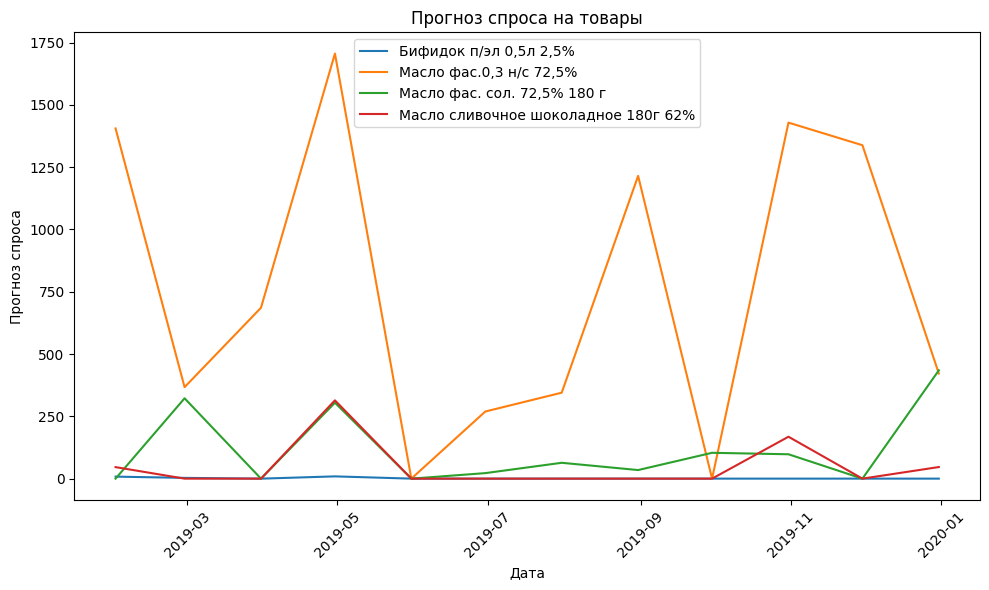

In [206]:
import matplotlib.pyplot as plt

# Прогноз для товара Бифидок п/эл 0,5л 2,5%
bifidok_pe = [8.108027, 3.082653, 0.0, 9.087213, 0.087542, 0.0, 0.087483, 0.087479, 0.087480, 0.087480, 0.087480, 0.087480]

# Прогноз для товара Масло фас.0,3 н/с 72,5%
maslo_fas_03_ns = [1405.318179, 367.129805, 685.798521, 1705.688606, 0.0, 269.362446, 344.924622, 1214.901413, 0.0, 1428.652546, 1337.948163, 421.811972]

# Прогноз для товара Масло фас. сол. 72,5% 180 г
maslo_fas_sol = [0.0, 322.411927, 0.0, 304.669237, 0.0, 22.165637, 63.619815, 34.449659, 103.717544, 97.82525, 0.0, 434.675615]

# Прогноз для товара Масло сливочное шоколадное 180г 62%
maslo_slivochnoe_shokoladnoe = [46.262181, 0.0, 0.0, 314.140011, 0.0, 0.0, 0.0, 0.0, 0.0, 168.208084, 0.0, 46.597812]

# Даты для оси x
dates = pd.date_range(start='2019-01', periods=12, freq='M')

# Построение графиков
plt.figure(figsize=(10, 6))

plt.plot(dates, bifidok_pe, label='Бифидок п/эл 0,5л 2,5%')
plt.plot(dates, maslo_fas_03_ns, label='Масло фас.0,3 н/с 72,5%')
plt.plot(dates, maslo_fas_sol, label='Масло фас. сол. 72,5% 180 г')
plt.plot(dates, maslo_slivochnoe_shokoladnoe, label='Масло сливочное шоколадное 180г 62%')

plt.xlabel('Дата')
plt.ylabel('Прогноз спроса')
plt.title('Прогноз спроса на товары')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Этот код строит графики прогнозов спроса на несколько товаров из списка. Каждый график показывает прогнозируемый спрос на протяжении 12 месяцев.

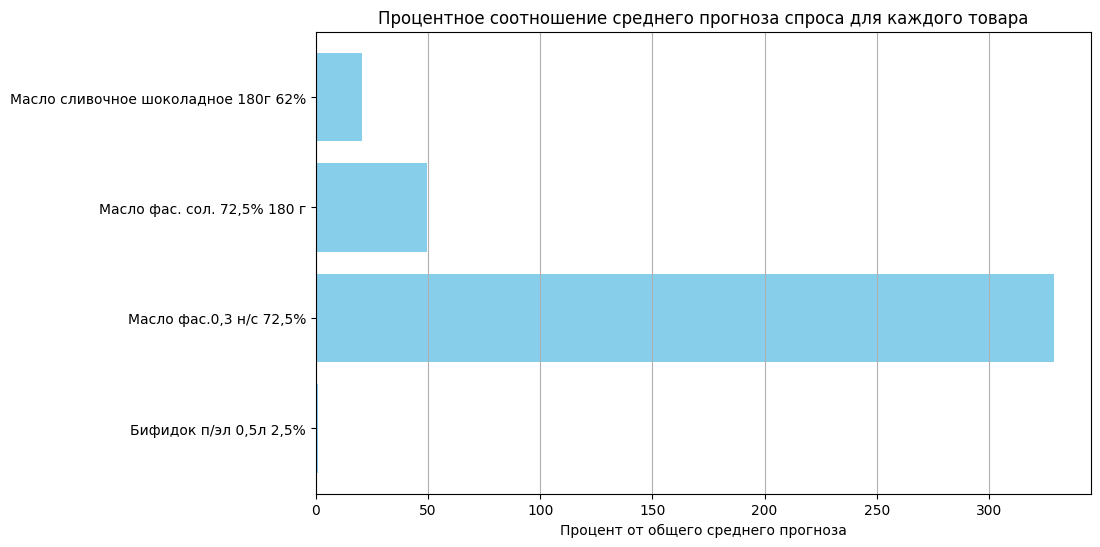

In [208]:
# Прогнозы спроса для всех товаров
all_forecasts = {
    'Бифидок п/эл 0,5л 2,5%': bifidok_pe,
    'Масло фас.0,3 н/с 72,5%': maslo_fas_03_ns,
    'Масло фас. сол. 72,5% 180 г': maslo_fas_sol,
    'Масло сливочное шоколадное 180г 62%': maslo_slivochnoe_shokoladnoe,
}

# Вычисляем средний прогноз спроса для каждого товара
avg_forecasts = {item: np.mean(forecasts) for item, forecasts in all_forecasts.items()}

# Вычисляем общий средний прогноз спроса для всех товаров
total_avg_forecast = np.mean(list(avg_forecasts.values()))

# Преобразуем средние прогнозы в процентное соотношение от общего среднего прогноза
percentages = {item: (forecast / total_avg_forecast) * 100 for item, forecast in avg_forecasts.items()}

# Построение графика
plt.figure(figsize=(10, 6))

plt.barh(list(percentages.keys()), list(percentages.values()), color='skyblue')
plt.xlabel('Процент от общего среднего прогноза')
plt.title('Процентное соотношение среднего прогноза спроса для каждого товара')
plt.grid(axis='x')

plt.show()

Этот код вычисляет средний прогноз спроса для каждого товара за весь прогнозируемый период, затем представляет каждый прогноз в процентном соотношении от общего среднего прогноза. Результаты визуализированы в виде горизонтальной столбчатой диаграммы.